# Decision Tree


## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### (2) 데이터 준비

In [10]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

## 2.데이터 준비

### (1) 데이터 정리

In [11]:
data.drop('EmployeeNumber', axis = 1, inplace = True)

### (2) 데이터분할1 : x, y 나누기

In [12]:
# x와 y 분리
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [13]:
cat_cols = ['Gender','JobSatisfaction','MaritalStatus','OverTime']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

### (5) 데이터분할2 : train : validation 나누기

In [14]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

### (6) Scaling

## 3.모델링

### (1) 필요한 함수 불러오기

* DecisionTree
    * DecisionTreeClassifier : 분류
    * DecisionTreeRegressor : 회귀

In [15]:
# 모델링을 위해
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 평가를 위해
from sklearn.metrics import *

### (2) 선언

In [16]:
model = DecisionTreeClassifier() # default로 만들면 가장 복잡한 tree가 된다.

### (3) 모델링(학습)

In [17]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

### (4) 검증 : 예측

In [18]:
pred = model.predict(x_val)

### (5) 검증 : 평가

* confusion matrix

In [19]:
print(confusion_matrix(y_val, pred))

[[262  38]
 [ 38  21]]


* classification report

In [20]:
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       300
           1       0.36      0.36      0.36        59

    accuracy                           0.79       359
   macro avg       0.61      0.61      0.61       359
weighted avg       0.79      0.79      0.79       359



## 4.Hyper Parameter

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

* max_depth : 트리의 깊이(크기를 결정)
* min_samples_leaf : leaf 노드의 최소 데이터 건수
    * leaf 노드는 y를 예측하는데 사용되는데, 데이터가 적으면 예측 결과에 대해 신뢰도가 떨어질 수 있다.


### (1) max_depth

In [20]:
# max_depth = 2
model1 = DecisionTreeClassifier(max_depth = 2)  # 복잡하다고 꼭 좋은건 아니구나. # 오캄의 면도날(의미/배경)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
print(classification_report(y_val, pred1))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       300
           1       0.47      0.31      0.37        59

    accuracy                           0.83       359
   macro avg       0.67      0.62      0.64       359
weighted avg       0.81      0.83      0.81       359



In [21]:
# max_depth = 5
model2 = DecisionTreeClassifier(max_depth = 5)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
print(classification_report(y_val, pred2))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       300
           1       0.44      0.25      0.32        59

    accuracy                           0.82       359
   macro avg       0.65      0.60      0.61       359
weighted avg       0.80      0.82      0.80       359



### (2) min_samples_leaf

In [22]:
# min_samples_leaf = 30
model3 = DecisionTreeClassifier(min_samples_leaf = 30)  # 30까지 쪼개고 멈춰라
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       300
           1       0.52      0.22      0.31        59

    accuracy                           0.84       359
   macro avg       0.69      0.59      0.61       359
weighted avg       0.81      0.84      0.81       359



In [23]:
# min_samples_leaf = 60
model4 = DecisionTreeClassifier(min_samples_leaf = 60)  # 60까지 가고 멈춰라
model4.fit(x_train, y_train)
pred4 = model4.predict(x_val)
print(classification_report(y_val, pred4))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       300
           1       0.47      0.31      0.37        59

    accuracy                           0.83       359
   macro avg       0.67      0.62      0.64       359
weighted avg       0.81      0.83      0.81       359



## 5.Decision Tree 내부 들여다 보기

### (1) 모델 시각화

https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [24]:
y_train.head()

751    0
34     0
503    0
741    0
10     0
Name: Attrition, dtype: int64

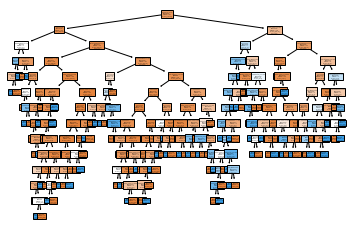

In [25]:
# 시각화
from sklearn.tree import plot_tree 

# Decision Tree는 모델을 시각화 할 수 있습니다.
plot_tree(model,                                    #만든 모델 이름
               feature_names = list(x_train),     #Feature 이름, list(x_train)
               class_names = ['Stay', 'Leave'],      #Target(Class) 이름 
               filled = True);

#### 1) max_depth = 2

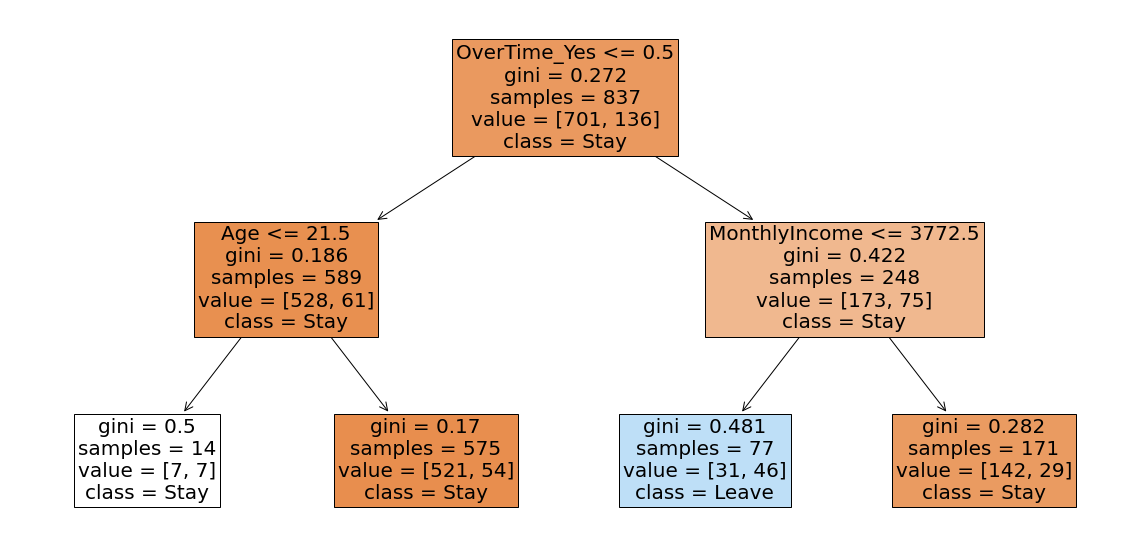

In [26]:
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model1, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 20);

#### 2) max_depth = 5

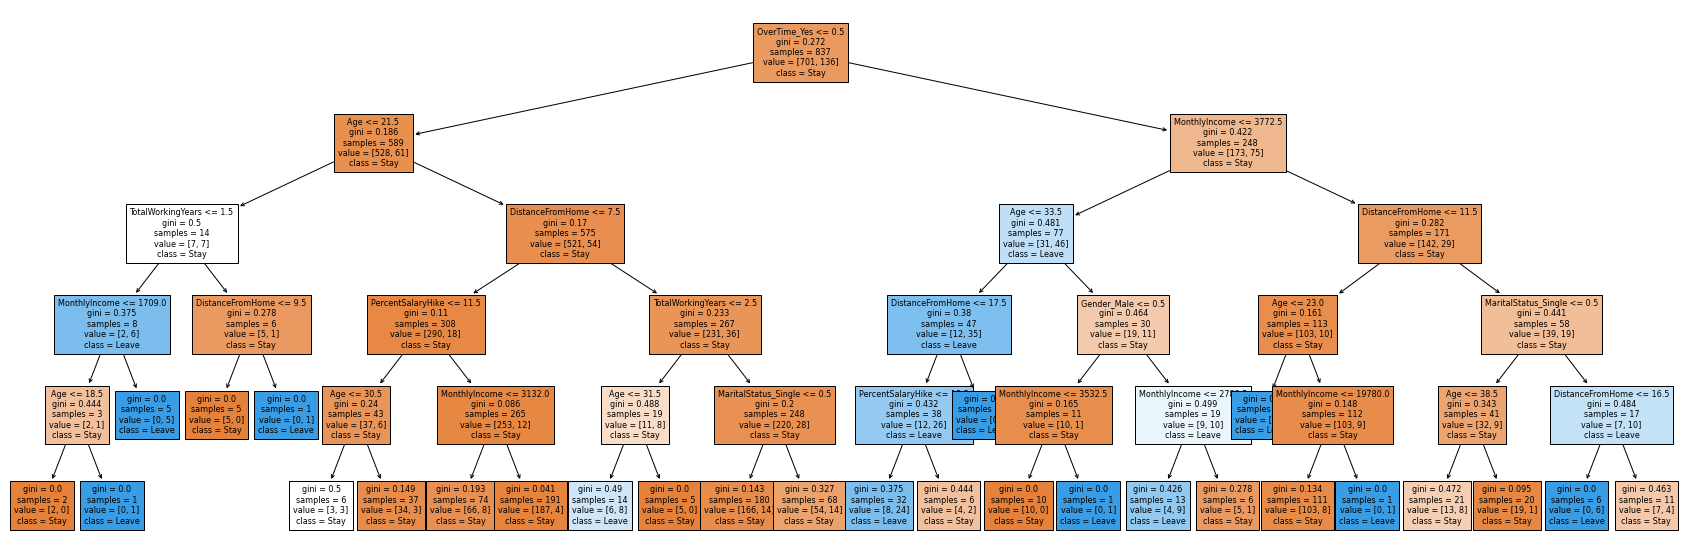

In [40]:
plt.figure(figsize = (30,10)) # 그림 사이즈 조절
plot_tree(model2, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 8);

#### 3) min_samples_leaf = 30

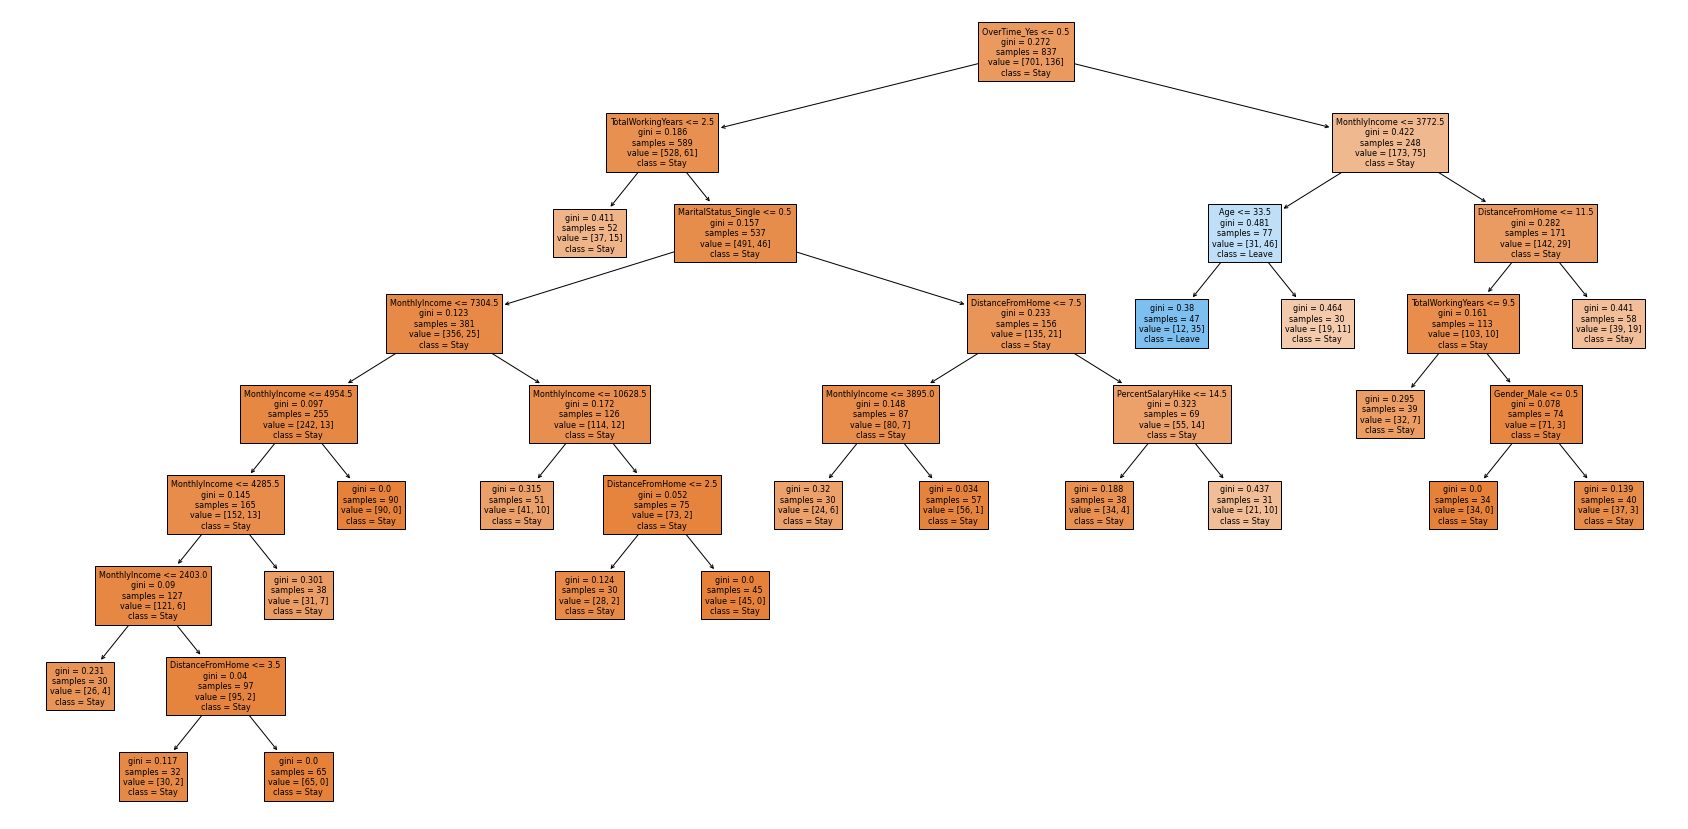

In [41]:
plt.figure(figsize = (30,15)) # 그림 사이즈 조절
plot_tree(model3, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 8);

#### 4) min_samples_leaf = 60

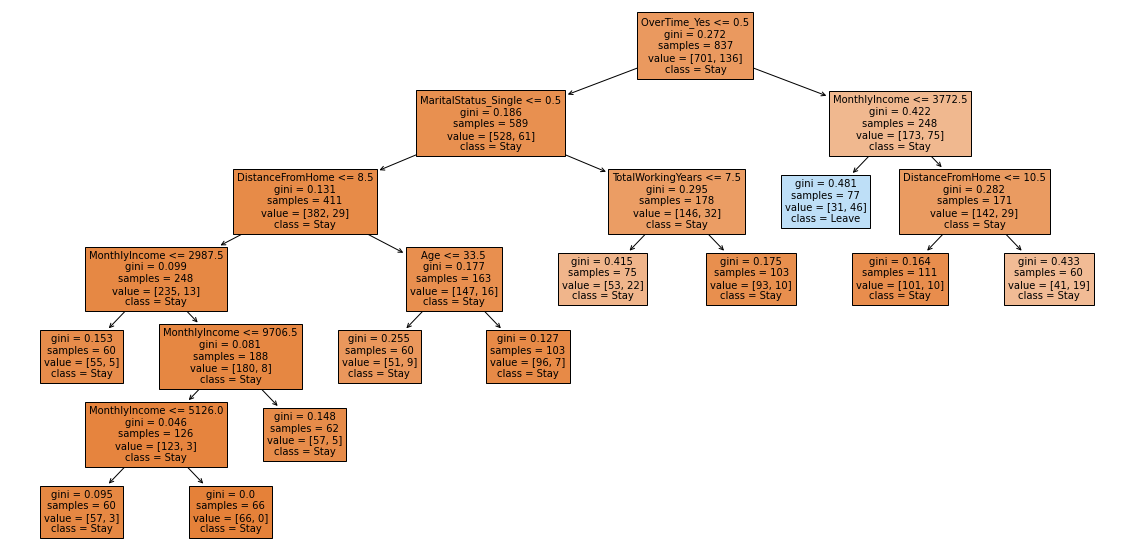

In [42]:
plt.figure(figsize = (20,10)) # 그림 사이즈 조절
plot_tree(model4, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 10);

### (2) 변수 중요도

In [27]:
# 변수 중요도
print(list(x_train))
print(model.feature_importances_)

['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'Gender_Male', 'JobSatisfaction_2', 'JobSatisfaction_3', 'JobSatisfaction_4', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']
[0.17518074 0.12835679 0.29435143 0.08285101 0.12003754 0.02952106
 0.01933765 0.01950994 0.03709833 0.00702358 0.02614502 0.06058689]


* 변수중요도 그래프 그리기 함수 만들기

In [48]:
#실전에서 많이 씀[ 변수중요도 그래프 ]
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

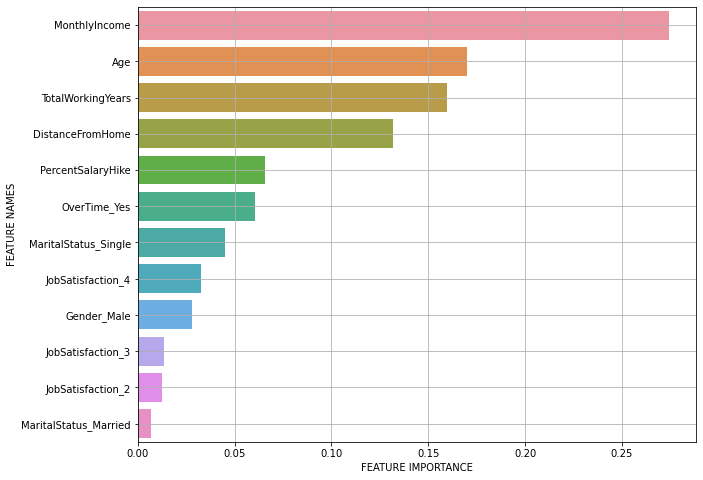

In [49]:
result = plot_feature_importance(model.feature_importances_, list(x_train))

In [50]:
result

,feature_names,feature_importance
0,MonthlyIncome,0.274415
1,Age,0.169730
2,TotalWorkingYears,0.159493
3,DistanceFromHome,0.131519
4,PercentSalaryHike,0.065656
5,OverTime_Yes,0.060587
6,MaritalStatus_Single,0.045167
7,JobSatisfaction_4,0.032381
8,Gender_Male,0.028058
9,JobSatisfaction_3,0.013657


* 1~10까지 depth를 늘려가면서 성능측정(f1)

In [51]:
depth = range(1,11)
f1 = []
for d in depth :
    m = DecisionTreeClassifier(max_depth = d)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    f1.append( f1_score(y_val, p) )

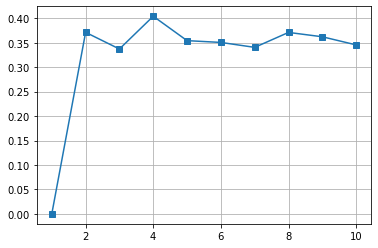

In [52]:
plt.plot(depth, f1, marker = 's')
plt.grid()
plt.show()

실전에서는 방금 수행한 작업으로 for loop로 이용하기 보다는 Grid Search, Random Search 방식의 튜닝을 수행하게 됩니다.

## 6.실습 : 이동통신 가입 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)


### (1) 데이터 전처리

In [28]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)

In [29]:
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,0,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,2,1,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,3,1,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,4,0,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,5,1,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


* 변수정리 : 불필요한 변수를 정리합시다.
    * 식별자 : 일련번호, 주민번호, 전화번호, 고객ID, 사번 
    * 시계열 데이터 중 : 어떤 기간동안 거의 변화가 없는 값.(변동이 거의 없는) 값.


In [30]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

* x, y 분할

In [31]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화 

In [32]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

* train, val 분할

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.3)

### (2) 모델링
* max_depth를 1~10 사이에서 조정하며 모델을 생성하고 성능을 비교해 봅시다.
* min_samples_leaf 를 20 ~ 300 사이에서 조정하며 모델을 생성하고 성능을 비교해 봅시다.

In [36]:
depth = range(1,11)
acc1 = []

for d in depth :
    m = DecisionTreeClassifier(max_depth = d)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    acc1.append(accuracy_score(y_val, p))

In [37]:
leaf_samples = range(20,301,10)
acc2 = []

for s in leaf_samples :
    m = DecisionTreeClassifier(min_samples_leaf = s)
    m.fit(x_train, y_train)
    p = m.predict(x_val)
    acc2.append(accuracy_score(y_val, p))

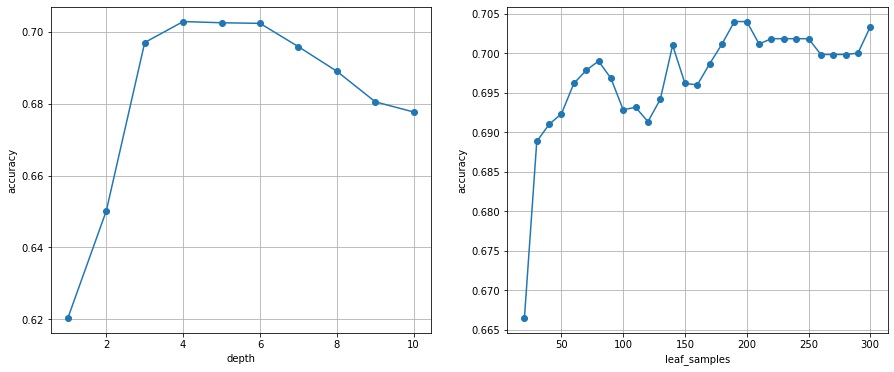

In [38]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
plt.plot(depth, acc1, marker = 'o')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(leaf_samples, acc2, marker = 'o')
plt.xlabel('leaf_samples')
plt.ylabel('accuracy')
plt.grid()

In [65]:
m1 = DecisionTreeClassifier(max_depth = 5)
m1.fit(x_train, y_train)
p1 = m1.predict(x_val)

In [66]:
m2 = DecisionTreeClassifier(min_samples_leaf=20)
m2.fit(x_train, y_train)
p2 = m2.predict(x_val)

In [67]:
m3 = DecisionTreeClassifier(min_samples_leaf=200)
m3.fit(x_train,y_train)
p3 = m3.predict(x_val)

### (3) 최적의 모델에 대해 시각화 및 변수 중요도를 살펴 봅시다.


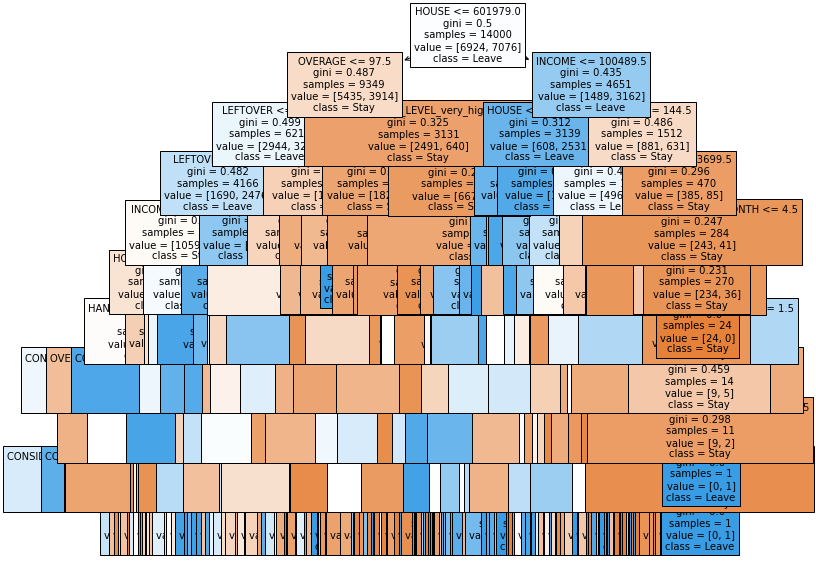

----------------------------------------------------------------------------------------
['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little', 'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little', 'CONSIDERING_CHANGE_OF_PLAN_considering', 'CONSIDERING_CHANGE_OF_PLAN_never_thought', 'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps']
[0.01751587 0.20023496 0.29363062 0.11469651 0.22584211 0.06203003
 0.02926063 0.0158861  0.000615   0.00420602 0.00695285 0.00428423
 0.         0.00162934 0.00214231 0.00799657 0.00176498 0.00295396
 0.00646778 0.00189012]
----------------------------------------------------------------------------------------
              precision    recall  f1-score   support

In [39]:
# Decision Tree 시각화 및 변수중요도
plt.figure(figsize = (10,10)) # 그림 사이즈 조절
plot_tree(m1, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 10);
plt.show()
print('-'*88)
# 변수 중요도
print(list(x_train))
print(m1.feature_importances_)
print('-'*88)
print(classification_report(y_val, p1))

In [ ]:
plt.figure(figsize = (11,10)) # 그림 사이즈 조절
plot_tree(m2, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 10);
plt.show()
print('-'*88)
# 변수 중요도
print(list(x_train))
print(m2.feature_importances_)
print('-'*88)
print(classification_report(y_val, p2))

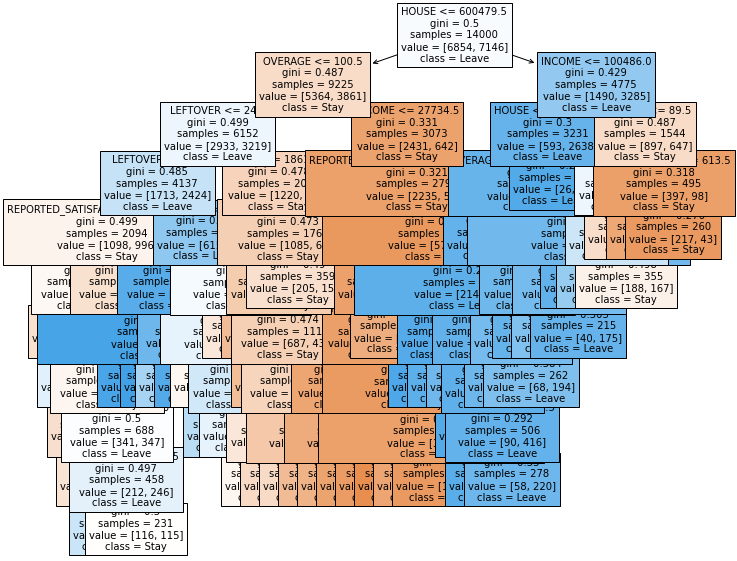

----------------------------------------------------------------------------------------
['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little', 'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little', 'CONSIDERING_CHANGE_OF_PLAN_considering', 'CONSIDERING_CHANGE_OF_PLAN_never_thought', 'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps']
[4.71790858e-04 2.05326715e-01 3.62211254e-01 1.30916207e-01
 2.85838379e-01 7.40470870e-03 1.77732730e-03 2.17070522e-03
 0.00000000e+00 1.09169511e-03 2.62002456e-03 1.71193069e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
-------------------------------------------------------------

In [80]:
plt.figure(figsize = (11,10)) # 그림 사이즈 조절
plot_tree(m3, feature_names = list(x_train), 
               class_names= ['Stay', 'Leave'], filled = True, fontsize = 10);
plt.show()
print('-'*88)
# 변수 중요도
print(list(x_train))
print(m3.feature_importances_)
print('-'*88)
print(classification_report(y_val, p3))

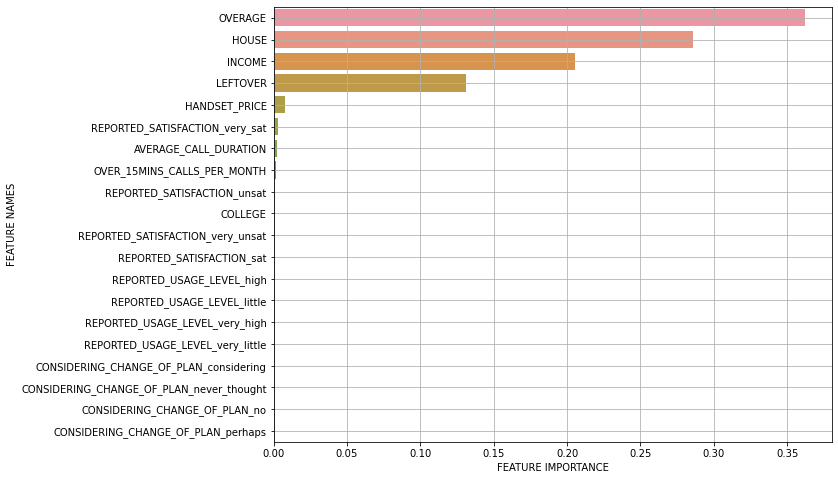

In [83]:
result = plot_feature_importance(m3.feature_importances_, list(x_train))